```
Realizado por Yuan Mejia Vasquez 1099392. 

Para la materia de Laboratorio de Analisis Numerico (CBM307L).

18 de abril del 2022.
```

**Objetivo:** Estudiar los métodos numéricos que permiten aproximar ecuaciones diferenciales de primer orden.

# Ecuaciones Diferenciales.

Una ecuación diferencial es una ecuación matemática que relaciona una función con sus derivadas. Como estas relaciones son muy comunes, las ecuaciones diferenciales juegan un rol primordial en diversas disciplinas, incluyendo la ingeniería, la física, la química, la economía y la biología.

Una solución de una ecuación diferencial es una función que al reemplazar a la función incógnita, en cada caso con sus derivadas correspondientes.

La solución general es una solución de tipo genérico, expresada con una o más constantes. Es un haz de curvas. Tiene un orden de infinitud de acuerdo a su cantidad de constantes (una constante corresponde a una familia simplemente infinita, dos constantes a una familia doblemente infinita, etc). En caso de que la ecuación sea lineal, la solución general se logra como combinación lineal de las soluciones (tantas como el orden de la ecuación) de la ecuación homogénea (que resulta de hacer el término no dependiente de ni de sus derivadas igual a 0) más una solución particular de la ecuación completa

Si fijando cualquier punto por donde debe pasar necesariamente la solución de la ecuación diferencial, existe un único valor de C, y por lo tanto de la curva integral que satisface la ecuación, este recibirá el nombre de solución particular de la ecuación en el punto, que recibe el nombre de condición inicial.

Es un caso particular de la solución general, en donde la constante (o constantes) recibe un valor específico.

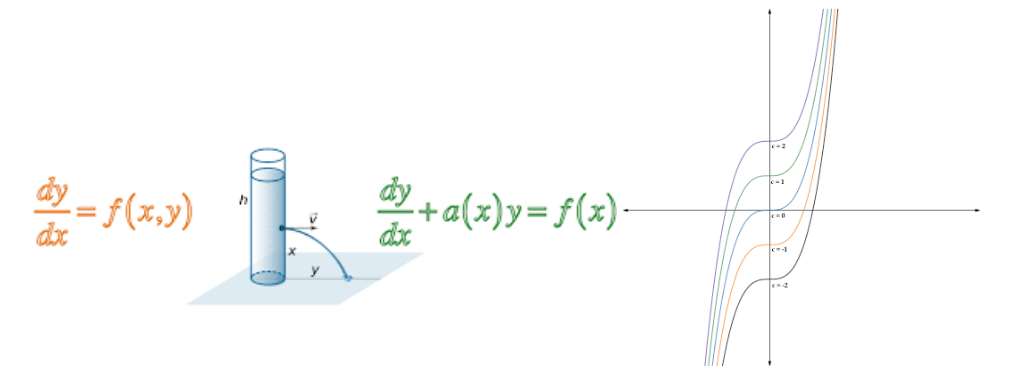

## Ecuaciones diferenciales de primer orden.

La resolución de ecuaciones diferenciales analíticamente, a menudo, lleva una serie de técnicas que, por lo general, incluyen operaciones como la integración, ya que se intenta integrar las derivadas para encontrar la funcion correspondiente. Una ecuación diferencial puede presentar un orden 2, si presenta una segunda derivada. Sin embargo, **durante este caso práctico me enfocaré en los métodos numéricos para resolver ecuaciones diferenciales de primer orden.** 

\\
**¿Por qué utilizar métodos numericos para aproximar resultados de ecuaciones diferenciales?**
Aunque no podamos tener una solución exacta, podríamos modelar fenomenos de diversas areas como la ingenieria, la economia, entre otros y modelar una función que se acerque a las aproximaciones que llegamos mediante el analisis numerico.

\\
En primer lugar, una ecuación diferencial  de primer orden es una ecuación diferencial  donde intervienen derivadas de primer orden respecto a una variable independiente. Uno de los métodos más comunes consiste en separar las variables e integrar ambos lados de la ecuación. Sin embargo, ¿qué pasa si la integral no puede integrarse analíticamente? Por ejemplo,

$\ y' = x^{2}+y^2 $

$\ dy = (x^{2}+y^2) \cdot dx$

$\int dy = \int (x^{2}+y^2)\cdot dx $

Ecuacion que no podemos separar, por lo cual no tiene solución analitica. Por lo cual, si utilizamos métodos numéricos podemos aproximar el valor de la función real en cualquier punto que necesitemos con tan solo tener la ecuación en su forma estándar y un valor inicial. 

**Método de Euler**:
Consiste en ir incrementando paso a paso la variable independiente y hallando la siguiente imagen (la función evaluada en ese punto) con la derivada. El cual se puede obtener por medio del polinomio de Taylor de orden 1 como se mencionó anteriormente.

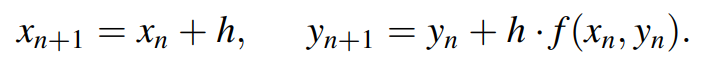

Veamos si el algoritmo para una funcion que tenga solucion analitica como lo es $\ y' = x+ \frac{1}{5}y $, y presentemos una tabla de todos los puntos que ocupa la funcion en un intervalo dado $[0,1]$ con el valor inicial $\ y(0) = -3 $ y un tamaño de pasos de $h = 0.1 $. Comparemos con la solucion analitica que es 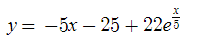

 x  Metodo de Euler con h = 0.1 valor con OdeINT [1]   valor analitico  
--- --------------------------- -------------------- -------------------
0.0                        -3.0  -3.1457652153176507                -3.0
0.1                       -3.06  -3.2042803238071764  -3.055570519411372
0.2                     -3.1112  -3.2538769091252586  -3.102162967767459
0.3         -3.1534240000000002   -3.294374740969124  -3.139595976002088
0.4                 -3.18649248   -3.325590015127821 -3.1676845111509095
0.5               -3.2102223296   -3.347335209431115 -3.1862398023357485
0.6         -3.2244267761920002   -3.359419015421186 -3.1950692652537356
0.7         -3.2289153117158405  -3.3616462602832664  -3.193976425140999
0.8          -3.223493617950157  -3.3538178284316587 -3.1827608381801724
0.9         -3.2079634903091603   -3.335730581636446 -3.1612180113201767
1.0         -3.1821227601153437  -3.3071772783606708 -3.1291393204762628


Text(0.5, 1.0, "y'= $x + y/5 $")

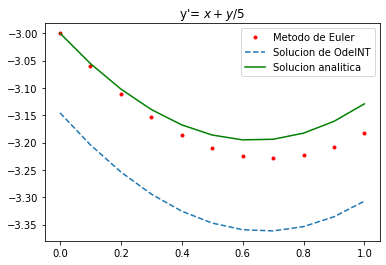

In [91]:
#Metodo de Euler
import sympy as sp
import numpy as np
import math as m
from astropy.table import Table
import matplotlib.pyplot as plt
import scipy.integrate as sco

#Definamos nuestras variables
x = sp.Symbol('x')
y = sp.Symbol('y')
def f(y,x):
  return x + (y/5)
lista_x = []
lista_y = []

#Valores con los que iniciará el algoritmo
x0 = 0
y0 = -3
a = 0
b = 1
h = 0.1

iteraciones = round((b-a)/h)

for i in range(0,iteraciones+1):
  lista_x.append(round(x0,1))
  lista_y.append(y0)
  y_n = y0 + h * (f(y0,x0))
  x0 += h
  y0 = y_n

#Resolvamoslo con ODEINT
x = np.linspace(0,1.0,11)
sol = sco.odeint(f,y0,x)

#Definamos la solucion analitica
def solucion_analitica(x):
  return (-5*x -25 + 22 * m.exp(x/5))

soluciones_analiticas = []
for i in range(len(x)):
  soluciones_analiticas.append(solucion_analitica(x[i]))
tabla = Table([lista_x, lista_y,sol, soluciones_analiticas], names=('x', 'Metodo de Euler con h = 0.1', 'valor con OdeINT', 'valor analitico'))
print(tabla)

plt.plot(lista_x, lista_y,'.r')
plt.plot(x,sol,'--')
plt.plot(x,soluciones_analiticas, '-g')
plt.legend(['Metodo de Euler', 'Solucion de OdeINT', 'Solucion analitica'])
plt.title("y'= $x + y/5 $")

Podemos ver que el metodo de Euler es bueno, incluso da una mejor predicción para esta ecuación que  la librería integrada para ecuaciones diferenciales. Por eso es importante conocer los diversos metodos, no solo los integrados. Tomemos un tamaño de pasos más pequeños $ h  = 0.01$. 

 x   Metodo de Euler h = 0.01 valor con OdeINT [1]   valor analitico  
---- ------------------------ -------------------- -------------------
 0.0                     -3.0  -3.1307748134326374                -3.0
0.01                   -3.006   -3.136992574710727 -3.0059559706519927
0.02      -3.0119119999999997   -3.143122685318969 -3.0118237650984803
0.03             -3.017735824  -3.1491649714618264   -3.01760320681057
0.04      -3.0234712956479997  -3.1551192658180343 -3.0232941189059837
0.05       -3.029118238239296  -3.1609853859885106  -3.028896324148306
0.06      -3.0346764747157744    -3.16676314925686 -3.0344096449462903
0.07       -3.040145827665206  -3.1724523795514292   -3.03983390335317
0.08      -3.0455261193205363  -3.1780528996315165  -3.045168921065912
0.09      -3.0508171715591774  -3.1835645319006654  -3.050414519424539
 ...                      ...                  ...                 ...
 0.9       -3.165952254709882   -3.317783815348855 -3.1612180113201767
0.91  

Text(0.5, 1.0, "y'= $x + y/5 $")

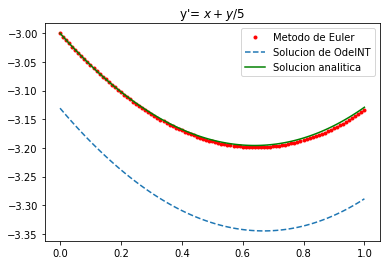

In [92]:
#Definamos nuestras variables
x = sp.Symbol('x')
y = sp.Symbol('y')
def f(y,x):
  return x + (y/5)
lista_x = []
lista_y = []

#Valores con los que iniciará el algoritmo
x0 = 0
y0 = -3
a = 0
b = 1
h = 0.01

iteraciones = round((b-a)/h)

for i in range(0,iteraciones+1):
  lista_x.append(round(x0,3))
  lista_y.append(y0)
  y_n = y0 + h * (f(y0,x0))
  x0 += h
  y0 = y_n

#Resolvamoslo con ODEINT
x = np.linspace(0,1.0,101)
sol = sco.odeint(f,y0,x)

#Definamos la solucion analitica
def solucion_analitica(x):
  return (-5*x -25 + 22 * m.exp(x/5))

soluciones_analiticas = []
for i in range(len(x)):
  soluciones_analiticas.append(solucion_analitica(x[i]))
tabla = Table([lista_x, lista_y,sol, soluciones_analiticas], names=('x', 'Metodo de Euler h = 0.01', 'valor con OdeINT', 'valor analitico'))
print(tabla)

plt.plot(lista_x, lista_y,'.r')
plt.plot(x,sol,'--')
plt.plot(x,soluciones_analiticas, '-g')
plt.legend(['Metodo de Euler', 'Solucion de OdeINT', 'Solucion analitica'])
plt.title("y'= $x + y/5 $")

Podemos ver que la solucion analitica y la que propone el metodo de Euler se superponen. Por lo tanto, este es un recurso importante para este tipo de analisis, y es importante saber trabajar los algoritmos en este tipo de software ya que el numero de iteraciones es elevado. 

Ya que vimos que funciona, tratemos de usar el metodo para una funcion que no tiene **solucion analitica**. Como 
$\ y' = x^{2}+y^2 $ para un tamaño de pasos de $h=0.01$ para tener una mejor aproximacion en un el intervalo $[0,1]$ y con un valor inicial de $y(0) = 1$

 x   Metodo de Euler h = 0.01
---- ------------------------
 0.0                      1.0
0.01                     1.01
0.02                 1.020202
0.03         1.03061412120804
0.04        1.041244775876374
0.05       1.0521026827092725
0.06        1.063196883258913
0.07       1.0745367593846276
0.08       1.0861320518573157
0.09       1.0979928801980334
 ...                      ...
 0.9       10.804087534254192
0.91       11.979470608732461
0.92        13.42282876938731
0.93       15.233016091110226
0.94        17.56211288343046
0.95          20.655226972734
0.96        24.93063598568558
0.97       31.155218092193188
0.98       40.871103235914404
0.99        57.58517803312213
 1.0        90.75550632418586
Length = 101 rows


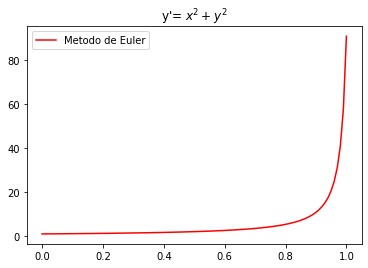

In [93]:
#Definamos nuestras variables
x = sp.Symbol('x')
y = sp.Symbol('y')
def f(y,x):
  return x**2 + y**2
lista_x = []
lista_y = []

#Valores con los que iniciará el algoritmo
x0 = 0
y0 = 1
a = 0
b = 1
h = 0.01

iteraciones = round((b-a)/h)

for i in range(0,iteraciones+1):
  lista_x.append(round(x0,3))
  lista_y.append(y0)
  y_n = y0 + h * (f(y0,x0))
  x0 += h
  y0 = y_n

tabla = Table([lista_x, lista_y], names=('x', 'Metodo de Euler h = 0.01'))
print(tabla)

plt.plot(lista_x, lista_y,'-r')
plt.title("y'= $x^{2} + y^{2}$")
plt.legend(['Metodo de Euler', 'Solucion de OdeINT'])

Así vemos, como pudimos encontrarle una solución numerica a un problema que no tiene solución analitica y que podriamos utilizar para modelar cualquier fenomeno fisico o economico como mencionamos anteriormente que esté descrito por una función de este tipo. Sin embargo, ¿existe forma de mejorar este algoritmo y hacerlo más eficiente?

La respuesta es sí, podemos corregir los errores cuando el tamaño de pasos sea muy pequeño. Para esto, podriamos utilizar el metodo de Euler mejorado y usar un predictor para corregir el error en cada iteración. 

## Metodo de Euler mejorado

El metodo de Euler mejorado propone que mediante un predictor pudieramos corregir la aproximación. Por lo cual, para tener una mejor aproximación no necesitariamos un tamaño de pasos tan pequeño como en el método anterior, lo cual lleva directamente a tener un gran número de iteraciones.

Llamaremos $u$ al predictor y $y$ será el resultado de nuestra aproximación.
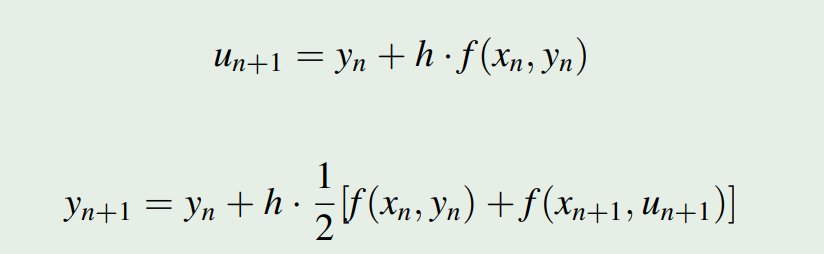
 
Pongamoslo a prueba. 

Veamos el mismo algoritmo para una funcion que tenga solucion analitica como lo es $\ y' = x+ \frac{1}{5}y $, y presentemos una tabla de todos los puntos que ocupa la funcion en un intervalo dado $[0,1]$ con el valor inicial $\ y(0) = 1 $ y un tamaño de pasos de $h = 0.1 $. Comparemos con el metodo anterior y con la solucion analitica  que es 

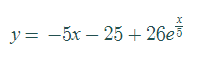

 x  Metodo de Euler h = 0.1 Metodo de Euler mejorado h = 0.1  valor analitico  
--- ----------------------- -------------------------------- ------------------
0.0                     1.0                              1.0                1.0
0.1                    1.02                           1.0202 1.0252348406956493
0.2                  1.0504                       1.05090804  1.061080129002093
0.3                1.091408                   1.092336382408 1.1077502101793506
0.4      1.1432361599999998               1.1447015773326414 1.1654637595489241
0.5      1.2061008831999998               1.2082245491947607 1.2344438699668387
0.6      1.2802229008639998                1.283130685088495  1.314918141063771
0.7      1.3658273588812797               1.3696499249272824 1.4071187702879122
0.8      1.4631439060589053               1.4680168534108136  1.511282645787066
0.9      1.5724067841800835                1.578470793849712  1.627651441167064
1.0      1.6938549198636852             

Text(0.5, 1.0, "y'= $x + y/5 $")

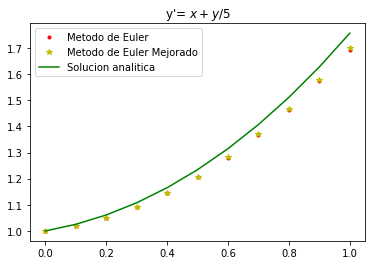

In [94]:
#Metodo de Euler mejorado
import sympy
x = sympy.Symbol('x')
y = sympy.Symbol('y')

def f(y,x):
  return x + (y/5)
lista_x = []
lista_euler = []
lista_euler_mejorado = []

#Valores con los que iniciará el algoritmo
x0 = 0
y0 = 1
a = 0
b = 1
h = 0.1

iteraciones = round((b-a)/h)

#Metodo de Euler
for i in range(0,iteraciones+1):
  lista_x.append(round(x0,3))
  lista_euler.append(y0)
  y_n = y0 + h * (f(y0,x0))
  x0 += h
  y0 = y_n

#Valores con los que iniciará el algoritmo
x0 = 0
y0 = 1
a = 0
b = 1
h = 0.1

#Metodo de Euler mejorado
for i in range(0,iteraciones+1):
  lista_euler_mejorado.append(y0)
  predictor = y0 + h * f(y0,x0)
  y_n = y0 + (0.5 * h) * (f(y0,x0)+f(predictor,x0))
  x0 += h
  y0 = y_n

x = np.linspace(0,1.0,11)

#Definamos la solucion analitica
def solucion_analitica(x):
  return (-5*x -25 + 26 * m.exp(x/5))

soluciones_analiticas = []
for i in range(len(x)):
  soluciones_analiticas.append(solucion_analitica(x[i]))
tabla = Table([lista_x, lista_euler, lista_euler_mejorado, soluciones_analiticas], names=('x', 'Metodo de Euler h = 0.1','Metodo de Euler mejorado h = 0.1' , 'valor analitico'))
print(tabla)


plt.plot(lista_x, lista_euler,'.r')
plt.plot(lista_x, lista_euler_mejorado, '*y')
plt.plot(x,soluciones_analiticas, '-g')
plt.legend(['Metodo de Euler','Metodo de Euler Mejorado', 'Solucion analitica'])
plt.title("y'= $x + y/5 $")


Podemos ver que toma mejores aproximaciones el metodo mejorado. Ya que podemos comprobar que funciona, pongamoslo a prueba con una ecuacion que no tenga solucion analitica. 

$\ y' = e^{cosx} $ para un tamaño de pasos de $h=0.05$ para tener una mejor aproximacion en un el intervalo $[0,1]$ y con un valor inicial de $y(0) = 1$

Luego, tratemos de usar la regresión de Python para encontrar la función que mejor se asemeja a las aproximaciones en el intervalo dado.

 x   Metodo de Euler mejorado h = 0.05
---- ---------------------------------
 0.0                               1.0
0.05                1.1359140914229522
 0.1                1.2716584317174189
0.15                 1.406895212079008
 0.2                 1.541291671394626
0.25                1.6745233534735993
 0.3                1.8062772058626773
0.35                1.9362544635849452
 0.4                 2.064173267506535
0.45                2.1897709747493166
 0.5                 2.312806127317777
0.55                 2.433060054546406
 0.6                 2.550338094737668
0.65                 2.664470431090826
 0.7                2.7753125463796215
0.75                2.8827453095184277
 0.8                2.9866747149055897
0.85                3.0870313020489086
 0.9                 3.183769288322123
0.95                3.2768654516957882
 1.0                3.3663178029143306


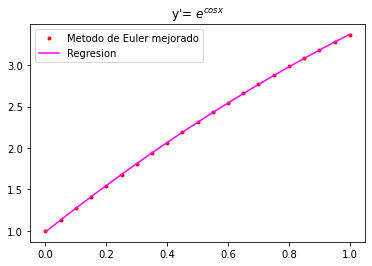

In [95]:
#Metodo de Euler mejorado
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sympy
x = sympy.Symbol('x')
y = sympy.Symbol('y')

def f(y,x):
  return np.exp(np.cos(x))
lista_x = []
lista_euler_mejorado = []

#Valores con los que iniciará el algoritmo
x0 = 0
y0 = 1
a = 0
b = 1
h = 0.05

iteraciones = round((b-a)/h)

#Metodo de Euler mejorado
for i in range(0,iteraciones+1):
  lista_x.append(round(x0,2))
  lista_euler_mejorado.append(y0)
  predictor = y0 + h * f(y0,x0)
  y_n = y0 + (0.5 * h) * (f(y0,x0)+f(predictor,x0))
  x0 += h
  y0 = y_n


tabla = Table([lista_x, lista_euler_mejorado], names=('x','Metodo de Euler mejorado h = 0.05' ))
print(tabla)

plt.plot(lista_x, lista_euler_mejorado,'.r')
plt.title("y'= $e^{cosx} $")

#Encontremos el modelo de regresion de grado 2
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(np.array(lista_x).reshape(-1,1))
poly.fit(X_poly, lista_euler_mejorado)
lin = LinearRegression()
lin.fit(X_poly, lista_euler_mejorado)

x = np.linspace(0,1.0,1000).reshape(-1,1)
plt.plot(x, lin.predict(poly.fit_transform(x)), color = 'magenta')
plt.legend(['Metodo de Euler mejorado', 'Regresion'])

Aquí podemos ver el conjunto de datos solución, y una función que trata de modelar la distribución de puntos.
Ya teniendo esto, podriamos predecir un valor de la funcion, que vemos que se ajusta bastante bien.
Por ejemplo, tratemos de predecir cual sera la solucion de la ecuacion en x = 5


In [96]:
#Ya teniendo esto, podriamos predecir un valor de la funcion, que vemos que se ajusta bastante bien
pred = 5
pred_array = np.array([[pred]])
print(f"La solucion de la ecuacion en {pred} es {lin.predict(poly.fit_transform(pred_array))[0]}")

La solucion de la ecuacion en 5 es 2.515239235016433


Durante la realización, se me ocurrió que podemos iterar el predictor y hacer que la predicción sea un poco más precisa. Veamos un ejemplo.

 x   Metodo de Euler mejorado h = 0.05 Metodo Yuan con h = 0.05
---- --------------------------------- ------------------------
 0.0                               1.0                      1.0
0.05                1.1359140914229522       1.1359140914229522
 0.1                1.2716584317174189       1.2716584317174189
0.15                 1.406895212079008        1.406895212079008
 0.2                 1.541291671394626        1.541291671394626
0.25                1.6745233534735993       1.6745233534735993
 0.3                1.8062772058626773       1.8062772058626773
0.35                1.9362544635849452       1.9362544635849452
 0.4                 2.064173267506535        2.064173267506535
0.45                2.1897709747493166       2.1897709747493166
 0.5                 2.312806127317777        2.312806127317777
0.55                 2.433060054546406        2.433060054546406
 0.6                 2.550338094737668        2.550338094737668
0.65                 2.664470431090826  

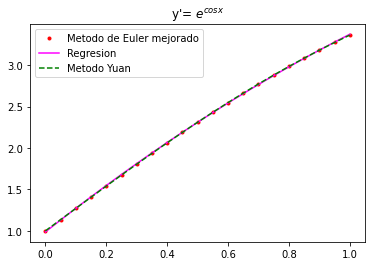

In [99]:
#Metodo Yuan. Valores con los que iniciará el algoritmo
x0 = 0
y0 = 1
a = 0
b = 1
h = 0.05
predictor0 = y0
x_predictor = x0
lista_yuan = []

def f(y,x):
  return np.exp(np.cos(x))


#Valores con los que iniciará el algoritmo
x0 = 0
y0 = 1
a = 0
b = 1
h = 0.05

iteraciones = round((b-a)/h)

#Metodo de Yuan 
for i in range(0,iteraciones+1):
  lista_yuan.append(y0)
  for j in range(0,iteraciones+1):
    predictor = predictor0 *(0.5*y0*h) * f(y0,x_predictor)
    predictor0 = predictor
  y_n = y0 + (0.5 * h) * (f(y0,x0)+f(predictor0,x0))
  x0 += h
  y0 = y_n

tabla = Table([lista_x, lista_euler_mejorado, lista_yuan], names=('x','Metodo de Euler mejorado h = 0.05', 'Metodo Yuan con h = 0.05' ))
print(tabla)
plt.plot(lista_x, lista_euler_mejorado,'.r')
plt.title("y'= $e^{cosx} $")
plt.plot(x, lin.predict(poly.fit_transform(x)), color = 'magenta')
plt.plot(lista_x, lista_yuan,'--g')
plt.legend(['Metodo de Euler mejorado', 'Regresion', 'Metodo Yuan'])


En conclusión, el análisis numérico y la computación nos proporcionan herramientas potentes para resolver problemas que de otro modo serían muy dificiles, sino que casi imposibles. Por tanto, dominar estas técnicas, saber cómo aplicar estos algoritmos, establecer comparaciones para verificar cúal modelo es mejor y graficarlos es de esencial dominio para nosotros las personas que estamos involucrados en un mundo de ciencia que es cada vez más demandante de soluciones que no podemos obtener con los métodos clásicos.